# Add tables to dataset

Start with the Social Vulnerability Index (SVI) and add that.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

%matplotlib inline
pd.set_option('display.max_columns',500)
sns.set()

In [3]:
def top_value_counts(df, n=5, only_categories = True, cols_to_include = None, cols_to_exclude = None):
    """ Function to generate summary information for string or categorical
    data in dataframes"""
    if cols_to_include:
        df = df[cols_to_include]
    if cols_to_exclude:
        df = df[df.columns[~df.columns.isin(cols_to_exclude)]]
    if only_categories:
        df = df.select_dtypes(include=['O','category'])
    cols = df.columns
    df_value_counts = pd.DataFrame()
    i_name = -1
    for col in cols:
        i_name += 1
        counts = df[col].value_counts(dropna=False)[:n]
        top_n_names = list(counts.index)
        top_n = list(counts)
        if len(top_n) < n+1:
            for i in range(n-len(top_n)):
                top_n.append('-')
                top_n_names.append('-')
        top_n_names.insert(0,'n_unique')
        top_n.insert(0,df[col].nunique())
        df_value_counts[col] = top_n_names
        df_value_counts[i_name] = top_n
    return(df_value_counts)

In [35]:
nfirs = pd.read_csv('../data/02_interim/03_nfirs_geoids.csv',dtype={'geoid':str})

C:\Users\thwhi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2,3,6,16,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
nfirs.head()

,rcp2_id,state,fdid,inc_no,city,street,zip5,inc_date,oth_inj,oth_death,exp_no,inc_type,prop_loss,cont_loss,tot_loss,detector,det_type,det_power,det_operat,det_effect,det_fail,aes_pres,aes_type,aes_oper,no_spr_op,aes_fail,geoid,match,match_type,tiger_line_id,tiger_line_side,lon,lat
0,rcp2_id1,AK,11100,211,JUNEAU,1700 ANGUS WAY,99801,2009-01-03,0.0,0.0,0.0,111,20000.0,5000.0,25000.0,1,1,1,2,1,NaN,N,NaN,NaN,NaN,NaN,02110000500,Match,Exact,190964136.0,R,-134.42440,58.306507
1,rcp2_id2,AK,11100,470,JUNEAU,3221 PIONEER AVE,99801,2009-01-06,0.0,0.0,0.0,114,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02110000600,Match,Exact,190966361.0,R,-134.43314,58.292686
2,rcp2_id3,AK,11100,556,JUNEAU,10231 HERON WAY,99801,2009-01-06,0.0,0.0,0.0,111,20000.0,5000.0,25000.0,N,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,02110000100,Match,Exact,190962538.0,R,-134.60330,58.402610
3,rcp2_id4,AK,11100,1315,JUNEAU,6590 GLACIER HWY,99801,2009-01-13,0.0,0.0,0.0,113,200.0,20.0,220.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02110000400,Match,Exact,190963741.0,R,-134.51932,58.358955
4,rcp2_id5,AK,11100,2151,JUNEAU,6590 GLACIER HWY,99801,2009-01-21,0.0,0.0,0.0,111,35000.0,5000.0,40000.0,N,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,02110000400,Match,Exact,190963741.0,R,-134.51932,58.358955


In [14]:
svi = pd.read_csv('../data/01_raw/SVI2016_US.csv',dtype={'FIPS':str})

In [26]:
svi.columns = svi.columns.str.lower()
cols_to_drop = ['fid','st','state','st_abbr','stcnty','county']
svi = svi.drop(cols_to_drop,axis=1)

In [53]:
nfirs[['oth_death','oth_inj']]=nfirs[['oth_death','oth_inj']].fillna(0.0)

In [83]:
nfirs['fatl_fire'] = nfirs['oth_death'] > 0
nfirs['dang_fire'] = (nfirs['oth_death'] > 0) | (nfirs['oth_inj'] > 0)

In [86]:
# nfirs_tract_level = nfirs.groupby('geoid')[['oth_death','oth_inj','tot_loss']].sum()
nfirs_tract_level = nfirs.groupby('geoid').agg({'oth_death':['sum','mean'],
                                                'oth_inj':['sum','mean'],
                                                'tot_loss':['sum'],
                                                'fatl_fire':'sum',
                                                'dang_fire':'sum',
                                                'geoid':'count'})

In [88]:
nfirs_tract_level.sort_values(('fatl_fire','sum'),ascending=False).head(10)
# nfirs_tract_level[nfirs_tract_level[('geoid','count')] > 5].sort_values([('oth_death','mean')],ascending=False).head(10)
# nfirs_tract_level.sort_values([('geoid','count')],ascending=False)

oth_death           oth_inj             tot_loss fatl_fire  \
                  sum      mean     sum      mean        sum       sum   
geoid                                                                    
47157011500      13.0  0.213115     1.0  0.016393  2616542.0       4.0   
45003021400       6.0  0.053097     8.0  0.070796  6609016.0       4.0   
47063100100       5.0  0.119048     2.0  0.047619  7084562.0       4.0   
12009064400       4.0  0.266667     4.0  0.266667  1130721.0       4.0   
05015950300       8.0  0.177778     0.0  0.000000  1047195.0       4.0   
21161960200       8.0  0.181818     3.0  0.068182  3851087.0       4.0   
16001000302       4.0  0.181818    12.0  0.545455  2758740.0       4.0   
05093010200       4.0  0.027586     5.0  0.034483  9358735.0       4.0   
47145030800       4.0  0.056338     0.0  0.000000  5300778.0       4.0   
39145003800       3.0  0.068182     4.0  0.090909  3441685.0       3.0   

            dang_fire geoid  
                  sum count  
geoid                        
47157011500       5.0    61  
45003021400      10.0   113  
47063100100       5.0    42  
12009064400       8.0    15  
05015950300       4.0    45  
21161960200       5.0    44  
16001000302       5.0    22  
05093010200       6.0   145  
47145030800       4.0    71  
39145003800       4.0    44

In [70]:
nfirs_tract_level.shape

(68129, 6)

In [89]:
combined = svi.merge(nfirs_tract_level,how='left',left_on='fips',right_index=True)

C:\Users\thwhi\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [77]:
combined

Index([               'fips',            'location',           'area_sqmi',
                  'e_totpop',            'm_totpop',                'e_hu',
                      'm_hu',                'e_hh',                'm_hh',
                     'e_pov',
       ...
                 'm_uninsur',          'ep_uninsur',          'mp_uninsur',
                  'e_daypop',  ('oth_death', 'sum'), ('oth_death', 'mean'),
          ('oth_inj', 'sum'),   ('oth_inj', 'mean'),   ('tot_loss', 'sum'),
          ('geoid', 'count')],
      dtype='object', length=125)

In [91]:
# combined.sort_values(('geoid', 'count'),ascending=False).head()
# combined.sort_values(('oth_death', 'sum'),ascending=False).head()
# combined['deaths_per_person'] = combined[('oth_death','sum')] / combined['e_totpop']
combined['dang_fires_per_person'] = combined[('dang_fire','sum')] / combined['e_totpop']

In [100]:
combined = combined.replace(-999.0,np.nan)

In [95]:
def plot_correlation_matrix_heat_map(df,label,qty_fields=10):
    df = pd.concat([df[label],df.drop(label,axis=1)],axis=1)
    correlation_matrix = df.corr()
    index = correlation_matrix.sort_values(label, ascending=False).index
    correlation_matrix = correlation_matrix[index].sort_values(label,ascending=False)

    fig,ax = plt.subplots()
    fig.set_size_inches((10,10))
    sns.heatmap(correlation_matrix.iloc[:qty_fields,:qty_fields],annot=True,fmt='.2f',ax=ax)
    return(fig,ax)

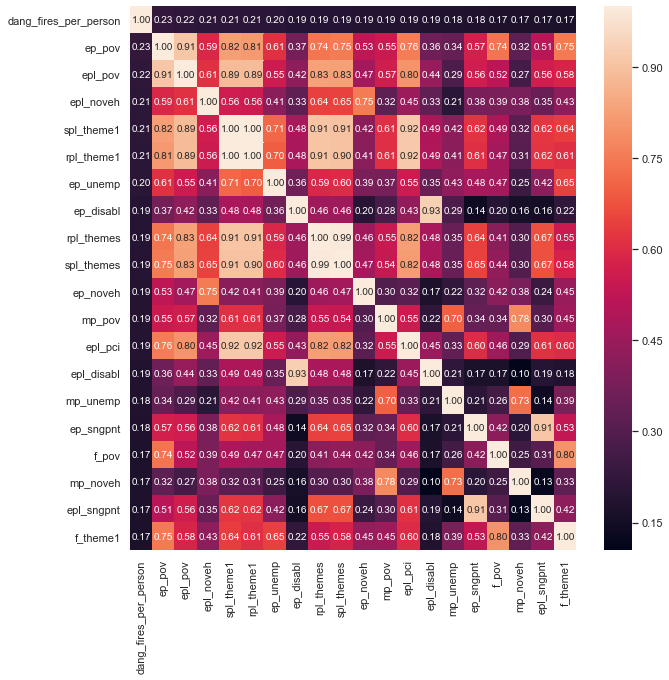

In [102]:
cols_to_drop = [('oth_death', 'sum'),('oth_death', 'mean'),('oth_inj', 'sum'),('oth_inj', 'mean'), ('tot_loss', 'sum'),
                ('fatl_fire', 'sum'),('dang_fire', 'sum'),('geoid', 'count')]
fig,ax = plot_correlation_matrix_heat_map(combined.drop(cols_to_drop,axis=1),'dang_fires_per_person',qty_fields=20)

In [97]:
combined

Index([                 'fips',              'location',
                   'area_sqmi',              'e_totpop',
                    'm_totpop',                  'e_hu',
                        'm_hu',                  'e_hh',
                        'm_hh',                 'e_pov',
       ...
                    'e_daypop',    ('oth_death', 'sum'),
         ('oth_death', 'mean'),      ('oth_inj', 'sum'),
           ('oth_inj', 'mean'),     ('tot_loss', 'sum'),
          ('fatl_fire', 'sum'),    ('dang_fire', 'sum'),
            ('geoid', 'count'), 'dang_fires_per_person'],
      dtype='object', length=128)

In [93]:
combined.sort_values('dang_fires_per_person',ascending=False)

,fips,location,area_sqmi,e_totpop,m_totpop,e_hu,m_hu,e_hh,m_hh,e_pov,m_pov,e_unemp,m_unemp,e_pci,m_pci,e_nohsdp,m_nohsdp,e_age65,m_age65,e_age17,m_age17,e_disabl,m_disabl,e_sngpnt,m_sngpnt,e_minrty,m_minrty,e_limeng,m_limeng,e_munit,m_munit,e_mobile,m_mobile,e_crowd,m_crowd,e_noveh,m_noveh,e_groupq,m_groupq,ep_pov,mp_pov,ep_unemp,mp_unemp,ep_pci,mp_pci,ep_nohsdp,mp_nohsdp,ep_age65,mp_age65,ep_age17,mp_age17,ep_disabl,mp_disabl,ep_sngpnt,mp_sngpnt,ep_minrty,mp_minrty,ep_limeng,mp_limeng,ep_munit,mp_munit,ep_mobile,mp_mobile,ep_crowd,mp_crowd,ep_noveh,mp_noveh,ep_groupq,mp_groupq,epl_pov,epl_unemp,epl_pci,epl_nohsdp,spl_theme1,rpl_theme1,epl_age65,epl_age17,epl_disabl,epl_sngpnt,spl_theme2,rpl_theme2,epl_minrty,epl_limeng,spl_theme3,rpl_theme3,epl_munit,epl_mobile,epl_crowd,epl_noveh,epl_groupq,spl_theme4,rpl_theme4,spl_themes,rpl_themes,f_pov,f_unemp,f_pci,f_nohsdp,f_theme1,f_age65,f_age17,f_disabl,f_sngpnt,f_theme2,f_minrty,f_limeng,f_theme3,f_munit,f_mobile,f_crowd,f_noveh,f_groupq,f_theme4,f_total,e_uninsur,m_uninsur,ep_uninsur,mp_uninsur,e_daypop,"(oth_death, sum)","(oth_death, mean)","(oth_inj, sum)","(oth_inj, mean)","(tot_loss, sum)","(fatl_fire, sum)","(dang_fire, sum)","(geoid, count)",dang_fires_per_person
197,26163985900,"Census Tract 9859, Wayne County, Michigan",0.241146,0.0,10.0,0.0,10.0,0.0,10.0,0.0,10.0,0.0,10.0,-999.0,-999.0,0.0,10.0,0.0,10.0,0.0,10.0,0.0,10.0,0.0,14.1,0.0,14.1,0.0,40.0,0.0,14.1,0.0,10.0,0.0,14.1,0.0,10.0,0.0,10.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,0.0,-999.0,0.0,-999.0,0.0,-999.0,0.0,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,0.0,-999.0,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,10.0,-999.0,-999.0,1441.0,0.0,0.000000,2.0,2.000000,30000.0,0.0,1.0,1.0,inf
397,51670980100,"Census Tract 9801, Hopewell city, Virginia",2.293744,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,-999.0,-999.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,17.0,0.0,17.0,0.0,48.0,0.0,17.0,0.0,12.0,0.0,17.0,0.0,12.0,0.0,12.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,0.0,-999.0,0.0,-999.0,0.0,-999.0,0.0,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,0.0,-999.0,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,12.0,-999.0,-999.0,3179.0,0.0,0.000000,2.0,2.000000,80100.0,0.0,1.0,1.0,inf
245,36061000500,"Census Tract 5, New York County, New York",0.325838,0.0,11.0,0.0,11.0,0.0,11.0,0.0,11.0,0.0,11.0,-999.0,-999.0,0.0,11.0,0.0,11.0,0.0,11.0,0.0,11.0,0.0,15.6,0.0,15.6,0.0,44.0,0.0,15.6,0.0,11.0,0.0,15.6,0.0,11.0,0.0,11.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,0.0,-999.0,0.0,-999.0,0.0,-999.0,0.0,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,0.0,-999.0,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,11.0,-999.0,-999.0,110.0,0.0,0.000000,2.0,0.074074,0.0,0.0,1.0,27.0,inf
62229,51730810600,"Census Tract 8106, Petersburg city, Virginia",0.482879,1669.0,19

In [71]:
svi.shape

(72836, 119)

In [72]:
svi.head()

,fips,location,area_sqmi,e_totpop,m_totpop,e_hu,m_hu,e_hh,m_hh,e_pov,m_pov,e_unemp,m_unemp,e_pci,m_pci,e_nohsdp,m_nohsdp,e_age65,m_age65,e_age17,m_age17,e_disabl,m_disabl,e_sngpnt,m_sngpnt,e_minrty,m_minrty,e_limeng,m_limeng,e_munit,m_munit,e_mobile,m_mobile,e_crowd,m_crowd,e_noveh,m_noveh,e_groupq,m_groupq,ep_pov,mp_pov,ep_unemp,mp_unemp,ep_pci,mp_pci,ep_nohsdp,mp_nohsdp,ep_age65,mp_age65,ep_age17,mp_age17,ep_disabl,mp_disabl,ep_sngpnt,mp_sngpnt,ep_minrty,mp_minrty,ep_limeng,mp_limeng,ep_munit,mp_munit,ep_mobile,mp_mobile,ep_crowd,mp_crowd,ep_noveh,mp_noveh,ep_groupq,mp_groupq,epl_pov,epl_unemp,epl_pci,epl_nohsdp,spl_theme1,rpl_theme1,epl_age65,epl_age17,epl_disabl,epl_sngpnt,spl_theme2,rpl_theme2,epl_minrty,epl_limeng,spl_theme3,rpl_theme3,epl_munit,epl_mobile,epl_crowd,epl_noveh,epl_groupq,spl_theme4,rpl_theme4,spl_themes,rpl_themes,f_pov,f_unemp,f_pci,f_nohsdp,f_theme1,f_age65,f_age17,f_disabl,f_sngpnt,f_theme2,f_minrty,f_limeng,f_theme3,f_munit,f_mobile,f_crowd,f_noveh,f_groupq,f_theme4,f_total,e_uninsur,m_uninsur,ep_uninsur,mp_uninsur,e_daypop
0,01015981902,"Census Tract 9819.02, Calhoun County, Alabama",34.644448,0.0,11.0,0.0,11.0,0.0,11.0,0.0,11.0,0.0,11.0,-999.0,-999.0,0.0,11.0,0.0,11.0,0.0,11.0,0.0,11.0,0.0,15.6,0.0,15.6,0.0,44.0,0.0,15.6,0.0,11.0,0.0,15.6,0.0,11.0,0.0,11.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,0.0,-999.0,0.0,-999.0,0.0,-999.0,0.0,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,11.0,-999.0,-999.0,335.0
1,01015981903,"Census Tract 9819.03, Calhoun County, Alabama",13.929908,0.0,11.0,0.0,11.0,0.0,11.0,0.0,11.0,0.0,11.0,-999.0,-999.0,0.0,11.0,0.0,11.0,0.0,11.0,0.0,11.0,0.0,15.6,0.0,15.6,0.0,44.0,0.0,15.6,0.0,11.0,0.0,15.6,0.0,11.0,0.0,11.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,0.0,-999.0,0.0,-999.0,0.0,-999.0,0.0,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,11.0,-999.0,-999.0,0.0
2,01097990000,"Census Tract 9900, Mobile County, Alabama",0.000000,0.0,11.0,0.0,11.0,0.0,11.0,0.0,11.0,0.0,11.0,-999.0,-999.0,0.0,11.0,0.0,11.0,0.0,11.0,0.0,11.0,0.0,15.6,0.0,15.6,0.0,44.0,0.0,15.6,0.0,11.0,0.0,15.6,0.0,11.0,0.0,11.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,0.0,-999.0,0.0,-999.0,0.0,-999.0,0.0,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,11.0,-999.0,-999.0,0.0
3,01117980000,"Census Tract 9800, Shelby County, Alabama",13.634818,0.0,11.0,0.0,11.0,0.0,11.0,0.0,11.0,0.0,11.0,-999.0,-999.0,0.0,11.0,0.0,11.0,0.0,11.0,0.0,11.0,0.0,15.6,0.0,15.6,0.0,44.0,0.0,15.6,0.0,11.0,0.0,15.6,0.0,11.0,0.0,11.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,0.0,-999.0,0.0,-999.0,0.0,-999.0,0.0,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,

In [29]:
combined = nfirs.merge(svi,how='left',left_on='geoid',right_on='fips')

In [30]:
combined.head()

,rcp2_id,state,fdid,inc_no,city,street,zip5,inc_date,oth_inj,oth_death,exp_no,inc_type,prop_loss,cont_loss,tot_loss,detector,det_type,det_power,det_operat,det_effect,det_fail,aes_pres,aes_type,aes_oper,no_spr_op,aes_fail,geoid,match,match_type,tiger_line_id,tiger_line_side,lon,lat,fips,location,area_sqmi,e_totpop,m_totpop,e_hu,m_hu,e_hh,m_hh,e_pov,m_pov,e_unemp,m_unemp,e_pci,m_pci,e_nohsdp,m_nohsdp,e_age65,m_age65,e_age17,m_age17,e_disabl,m_disabl,e_sngpnt,m_sngpnt,e_minrty,m_minrty,e_limeng,m_limeng,e_munit,m_munit,e_mobile,m_mobile,e_crowd,m_crowd,e_noveh,m_noveh,e_groupq,m_groupq,ep_pov,mp_pov,ep_unemp,mp_unemp,ep_pci,mp_pci,ep_nohsdp,mp_nohsdp,ep_age65,mp_age65,ep_age17,mp_age17,ep_disabl,mp_disabl,ep_sngpnt,mp_sngpnt,ep_minrty,mp_minrty,ep_limeng,mp_limeng,ep_munit,mp_munit,ep_mobile,mp_mobile,ep_crowd,mp_crowd,ep_noveh,mp_noveh,ep_groupq,mp_groupq,epl_pov,epl_unemp,epl_pci,epl_nohsdp,spl_theme1,rpl_theme1,epl_age65,epl_age17,epl_disabl,epl_sngpnt,spl_theme2,rpl_theme2,epl_minrty,epl_limeng,spl_theme3,rpl_theme3,epl_munit,epl_mobile,epl_crowd,epl_noveh,epl_groupq,spl_theme4,rpl_theme4,spl_themes,rpl_themes,f_pov,f_unemp,f_pci,f_nohsdp,f_theme1,f_age65,f_age17,f_disabl,f_sngpnt,f_theme2,f_minrty,f_limeng,f_theme3,f_munit,f_mobile,f_crowd,f_noveh,f_groupq,f_theme4,f_total,e_uninsur,m_uninsur,ep_uninsur,mp_uninsur,e_daypop
0,rcp2_id1,AK,11100,211,JUNEAU,1700 ANGUS WAY,99801,2009-01-03,0.0,0.0,0.0,111,20000.0,5000.0,25000.0,1,1,1,2,1,NaN,N,NaN,NaN,NaN,NaN,02110000500,Match,Exact,190964136.0,R,-134.42440,58.306507,02110000500,"Census Tract 5, Juneau City and Borough, Alaska",1903.027370,3437.0,322.0,1977.0,75.0,1640.0,133.0,338.0,177.0,44.0,37.0,44810.0,4512.0,88.0,70.0,557.0,132.0,528.0,137.0,385.0,123.0,93.0,65.6,846.0,446.3,33.0,60.1,674.0,131.2,0.0,9.0,51.0,53.7,318.0,99.0,37.0,48.0,9.8,5.0,2.2,1.9,44810.0,4512.0,3.1,2.4,16.2,3.5,15.4,3.7,11.2,3.7,5.7,4.0,24.6,12.8,1.0,1.8,34.1,6.5,0.0,0.9,3.1,3.3,19.4,5.7,1.1,1.4,0.3729,0.0504,0.1189,0.1047,0.6469,0.0949,0.6096,0.1154,0.4042,0.3025,1.4317,0.1582,0.4532,0.4434,0.8966,0.4470,0.8948,0.0000,0.6592,0.8752,0.6999,3.1292,0.8280,6.1043,0.3265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,401.0,132.0,11.7,3.4,9903.0
1,rcp2_id2,AK,11100,470,JUNEAU,3221 PIONEER AVE,99801,2009-01-06,0.0,0.0,0.0,114,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02110000600,Match,Exact,190966361.0,R,-134.43314,58.292686,02110000600,"Census Tract 6, Juneau City and Borough, Alaska",178.892611,6117.0,303.0,2741.0,70.0,2492.0,78.0,603.0,139.0,194.0,51.0,42777.0,2216.0,128.0,38.0,577.0,74.0,1226.0,200.0,553.0,88.0,214.0,50.2,1730.0,407.8,8.0,46.5,355.0,48.8,74.0,25.0,118.0,41.2,173.0,45.0,16.0,7.0,9.9,2.0,5.1,1.3,42777.0,2216.0,3.0,0.9,9.4,1.3,20.0,3.1,9.1,1.3,8.6,2.0,28.3,6.5,0.1,0.8,13.0,1.8,2.7,0.9,4.7,1.6,6.9,1.8,0.3,0.1,0.3771,0.3159,0.1389,0.0998,0.9318,0.1789,0.2026,0.3202,0.2479,0.5293,1.3000,0.1112,0.4972,0.1909,0.6881,0.3258,0.7074,0.6357,0.7769,0.5841,0.5122,3.2163,0.8557,6.1362,0.3312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,755.0,136.0,12.4,2.1,1470.0
2,rcp2_id3,AK,11100,556,JUNEAU,10231 HERON WAY,99801,2009-01-06,0.0,0.0,0.0,111,20000.0,5000.0,25000.0,N,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,02110000100,Match,Exact,190962538.0,R,-134.60330,58.402610,02110000100,"Census Tract 1, Juneau City and Borough, Alaska",557.060446,4651.0,358.0,2028.0,86.0,1854.0,130.0,184.0,87.0,131.0,56.0,50767.0,4729.0,103.0,79.0,410.0,103.0,945.0,189.0,354.0,120.0,104.0,64.8,662.0,502.8,25.0,43.1,66.0,56.9,43.0,53.0,52.0,35.4,0.0,9.0,127.0,62.0,4.1,1.9,4.6,1.9,50767.0,4729.0,3.1,2.4,8.8,2.2,20.3,3.8,7.7,2.6,5.6,3.5,14.2,10.8,0.6,0.9,3.3,2.8,2.1,2.6,2.8,1.9,0.0,0.9,2.7,1.3,0.1090,0.2594,0.0778,0.1047,0.5508,0.0707,0.1740,0.3383,0.1548,0.2976,0.9648,0.0472,0.2957,0.3373,0.6330,0.2959,0.4522,0.6099,0.6264,0.0000,0.8303,2.5187,0.5784,4.6674,0.1315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,594.0,264.0,1